# Imports

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
 !pip install scikit-learn==1.0

In [45]:
import sklearn
sklearn.__version__

'1.0'

In [46]:
from __future__ import print_function

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [58]:
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = 200

In [59]:
!pip install scorecardpy

In [60]:
import scorecardpy as sc

# Load and Prepare data

In [61]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [192]:
#ata = pd.read_csv('/content/drive/MyDrive/Case Studies/datasets/train.csv', sep=';', decimal=',')
# data = pd.read_csv('test_.csv')
data = pd.read_csv('/content/drive/MyDrive/DataAnalysis/train.csv')


display(data.shape)
display(data.tail())

(129987, 43)

,Unnamed: 0,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_20,F_21,F_22,F_23,F_24,F_25,F_26,F_27,F_28,F_29,F_30,F_31,F_32,F_33,F_34,F_35,F_36,F_37,F_38,F_39,F_40,Label
129982,178532,30.0,1500.0,0.0,1.0,48.166667,52.000000,59.0,115.0,305.366667,59.0,0.0,0.0,13.000000,0.0,1.0,29.0,0.0,0.0,72.333333,64.0,147.0,412.366667,0.000000,9.0,60.666667,54.0,807.0,5.0,1.0,2.0,1635.0,0.000000,0.000000,6.260837,1.594170,28.0,1.0,1.0,NaN,NaN,817.0,0
129983,38010,30.0,1690.0,0.0,1.0,399.833333,379.333333,430.0,717.0,485.400000,438.0,2.0,0.0,42.666667,4.0,0.0,366.0,11.0,0.0,390.000000,464.0,721.0,531.033333,3.500000,65.0,335.000000,399.0,3935.0,6.0,1.0,2.0,1918.0,0.000000,0.000000,302.382227,15.048894,5.0,2.0,2.0,3.0,NaN,1521.0,0
129984,8278,30.0,2590.0,0.0,1.0,80.833333,82.000000,79.0,182.0,572.350000,79.0,0.0,0.0,50.666667,0.0,0.0,32.0,0.0,0.0,72.000000,89.0,151.0,496.016667,0.000000,53.0,21.666667,32.0,237.0,29.0,1.0,2.0,2600.0,29.555556,0.000000,630.323509,640.323509,0.0,1.0,1.0,NaN,NaN,1518.0,0
129985,41398,30.0,5130.0,0.0,1.0,183.333333,184.666667,148.0,337.0,335.433333,154.0,0.0,0.0,20.000000,0.0,0.0,138.0,10.0,0.0,133.000000,131.0,263.0,280.450000,7.716667,51.0,92.000000,80.0,1149.0,5.0,3.0,4.0,1800.0,0.000000,0.000000,110.377798,382.377798,0.0,2.0,3.0,328.0,NaN,2375.0,0
129986,99170,30.0,1700.0,0.0,1.0,158.666667,164.666667,167.0,327.0,326.266667,169.0,2.0,0.0,53.333333,0.0,0.0,93.0,27.0,0.0,112.333333,105.0,226.0,113.933333,0.000000,33.0,70.000000,69.0,579.0,26.0,1.0,2.0,1710.0,5.666667,2.333333,1.681420,1.681420,30.0,4.0,5.0,308.0,NaN,1491.0,0


## Meta-Data

In [193]:
# X_cols = ['N1',	'N2',	'N3',	'N4',	'N5',	'N6',	'N7',	'N12',	'N13',	'N14',	'N15',	'N16',	'N17',	'N22',	'N23',	'C2_',	'C3_']
COL_TARGET = 'Label'
# WOE_cols = X_cols + [COL_TARGET]

COL_PRED = 'pred'
COL_SCORE_0 = 'score0'
COL_SCORE_1 = 'score1'

# Train

In [194]:
import pandas as pd

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [225]:
newData = clean_dataset(data)

In [226]:
newData.head()

,Unnamed: 0,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_20,F_21,F_22,F_23,F_24,F_25,F_26,F_27,F_28,F_29,F_30,F_31,F_32,F_33,F_34,F_35,F_36,F_37,F_38,F_39,F_40,Label
3,185293.0,12.0,0.000000,0.0,1.0,27.500000,11.666667,2.0,7.0,5.416667,3.0,1.0,0.0,1.666667,0.0,0.0,0.0,6.0,0.000000,77.333333,14.0,80.0,22.550000,0.000000,2.0,59.333333,12.0,1352.0,0.0,0.0,0.0,50.0,2.500000,0.0,1.166614,1.166614,30.0,3.0,6.0,354.0,354.0,467.0,0.0
4,143469.0,30.0,799.000000,0.0,1.0,6.500000,6.666667,5.0,10.0,4.033333,5.0,0.0,0.0,0.333333,0.0,0.0,4.0,0.0,0.000000,12.000000,9.0,23.0,8.583333,0.000000,4.0,10.333333,5.0,87.0,0.0,0.0,0.0,0.0,0.000000,0.0,-11082.129032,-11881.129032,30.0,1.0,2.0,208.0,288.0,446.0,0.0
13,12153.0,30.0,2523.900042,0.0,1.0,69.833333,90.333333,85.0,166.0,113.833333,117.0,2.0,0.0,31.666667,1.0,3.0,44.0,388.0,0.100000,63.000000,79.0,125.0,122.350000,0.000000,31.0,37.333333,44.0,188.0,13.0,8.0,9.0,1900.0,33.333333,0.0,16.410094,141.510052,6.0,2.0,2.0,26.0,179.0,167.0,0.0
25,89762.0,30.0,1631.833333,0.0,1.0,328.833333,329.000000,213.0,561.0,240.550000,227.0,0.0,0.0,84.666667,5.0,0.0,152.0,50.0,0.166667,174.666667,136.0,334.0,167.333333,2.833333,25.0,136.666667,110.0,1642.0,0.0,1.0,3.0,1700.0,145.000000,180.0,3.318096,1.484763,30.0,2.0,10.0,347.0,209.0,1233.0,0.0
30,108363.0,30.0,0.000000,0.0,1.0,173.166667,184.333333,153.0,379.0,239.950000,156.0,0.0,0.0,71.000000,3.0,0.0,74.0,23.0,0.000000,149.666667,129.0,277.0,352.050000,0.000000,47.0,73.333333,82.0,899.0,10.0,1.0,3.0,1700.0,0.000000,0.0,95.079782,1771.079782,0.0,4.0,4.0,172.0,339.0,1301.0,0.0


In [78]:
from sklearn.linear_model import LogisticRegression

In [109]:
# X_cols = ['F_1',	'F_4',	'F_5',	'F_6',	'F_7',	'F_12',	'F_13',	'F_14',	'F_15',	'F_16',	'F_17',	'F_22',	'F_23'] 
# ,	'F_5',	'N6',	'N7',	'N12',	'N13',	'N14',	'N15',	'N16',	'N17',	'N22',	'N23',	'C2_',	'C3_']

In [ ]:
# display(newData[X_cols])

In [197]:
display(newData[COL_TARGET])

3         0.0
4         0.0
13        0.0
25        0.0
30        0.0
         ... 
129936    0.0
129939    0.0
129963    0.0
129979    0.0
129980    0.0
Name: Label, Length: 16994, dtype: float64

In [114]:
# model = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
# model.fit(newData[X_cols], newData[COL_TARGET])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(C=0.9, n_jobs=-1, penalty='l1', solver='saga')

In [227]:
trainColumns = newData.drop('Unnamed: 0', axis=1)
trainColumns.head()

,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_20,F_21,F_22,F_23,F_24,F_25,F_26,F_27,F_28,F_29,F_30,F_31,F_32,F_33,F_34,F_35,F_36,F_37,F_38,F_39,F_40,Label
3,12.0,0.000000,0.0,1.0,27.500000,11.666667,2.0,7.0,5.416667,3.0,1.0,0.0,1.666667,0.0,0.0,0.0,6.0,0.000000,77.333333,14.0,80.0,22.550000,0.000000,2.0,59.333333,12.0,1352.0,0.0,0.0,0.0,50.0,2.500000,0.0,1.166614,1.166614,30.0,3.0,6.0,354.0,354.0,467.0,0.0
4,30.0,799.000000,0.0,1.0,6.500000,6.666667,5.0,10.0,4.033333,5.0,0.0,0.0,0.333333,0.0,0.0,4.0,0.0,0.000000,12.000000,9.0,23.0,8.583333,0.000000,4.0,10.333333,5.0,87.0,0.0,0.0,0.0,0.0,0.000000,0.0,-11082.129032,-11881.129032,30.0,1.0,2.0,208.0,288.0,446.0,0.0
13,30.0,2523.900042,0.0,1.0,69.833333,90.333333,85.0,166.0,113.833333,117.0,2.0,0.0,31.666667,1.0,3.0,44.0,388.0,0.100000,63.000000,79.0,125.0,122.350000,0.000000,31.0,37.333333,44.0,188.0,13.0,8.0,9.0,1900.0,33.333333,0.0,16.410094,141.510052,6.0,2.0,2.0,26.0,179.0,167.0,0.0
25,30.0,1631.833333,0.0,1.0,328.833333,329.000000,213.0,561.0,240.550000,227.0,0.0,0.0,84.666667,5.0,0.0,152.0,50.0,0.166667,174.666667,136.0,334.0,167.333333,2.833333,25.0,136.666667,110.0,1642.0,0.0,1.0,3.0,1700.0,145.000000,180.0,3.318096,1.484763,30.0,2.0,10.0,347.0,209.0,1233.0,0.0
30,30.0,0.000000,0.0,1.0,173.166667,184.333333,153.0,379.0,239.950000,156.0,0.0,0.0,71.000000,3.0,0.0,74.0,23.0,0.000000,149.666667,129.0,277.0,352.050000,0.000000,47.0,73.333333,82.0,899.0,10.0,1.0,3.0,1700.0,0.000000,0.0,95.079782,1771.079782,0.0,4.0,4.0,172.0,339.0,1301.0,0.0


In [228]:
trainColumns = trainColumns.drop('Label', axis=1)
trainColumns.head()

,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_20,F_21,F_22,F_23,F_24,F_25,F_26,F_27,F_28,F_29,F_30,F_31,F_32,F_33,F_34,F_35,F_36,F_37,F_38,F_39,F_40
3,12.0,0.000000,0.0,1.0,27.500000,11.666667,2.0,7.0,5.416667,3.0,1.0,0.0,1.666667,0.0,0.0,0.0,6.0,0.000000,77.333333,14.0,80.0,22.550000,0.000000,2.0,59.333333,12.0,1352.0,0.0,0.0,0.0,50.0,2.500000,0.0,1.166614,1.166614,30.0,3.0,6.0,354.0,354.0,467.0
4,30.0,799.000000,0.0,1.0,6.500000,6.666667,5.0,10.0,4.033333,5.0,0.0,0.0,0.333333,0.0,0.0,4.0,0.0,0.000000,12.000000,9.0,23.0,8.583333,0.000000,4.0,10.333333,5.0,87.0,0.0,0.0,0.0,0.0,0.000000,0.0,-11082.129032,-11881.129032,30.0,1.0,2.0,208.0,288.0,446.0
13,30.0,2523.900042,0.0,1.0,69.833333,90.333333,85.0,166.0,113.833333,117.0,2.0,0.0,31.666667,1.0,3.0,44.0,388.0,0.100000,63.000000,79.0,125.0,122.350000,0.000000,31.0,37.333333,44.0,188.0,13.0,8.0,9.0,1900.0,33.333333,0.0,16.410094,141.510052,6.0,2.0,2.0,26.0,179.0,167.0
25,30.0,1631.833333,0.0,1.0,328.833333,329.000000,213.0,561.0,240.550000,227.0,0.0,0.0,84.666667,5.0,0.0,152.0,50.0,0.166667,174.666667,136.0,334.0,167.333333,2.833333,25.0,136.666667,110.0,1642.0,0.0,1.0,3.0,1700.0,145.000000,180.0,3.318096,1.484763,30.0,2.0,10.0,347.0,209.0,1233.0
30,30.0,0.000000,0.0,1.0,173.166667,184.333333,153.0,379.0,239.950000,156.0,0.0,0.0,71.000000,3.0,0.0,74.0,23.0,0.000000,149.666667,129.0,277.0,352.050000,0.000000,47.0,73.333333,82.0,899.0,10.0,1.0,3.0,1700.0,0.000000,0.0,95.079782,1771.079782,0.0,4.0,4.0,172.0,339.0,1301.0


In [229]:
trainColumns = trainColumns.columns

In [200]:
import lightgbm as lgbm

In [230]:
counts = newData[COL_TARGET].value_counts(1)
class_weight={0: 1, 1: counts[0] / counts[1]}
print(class_weight)

model = lgbm.LGBMClassifier(class_weight=class_weight, silent=True, verbosity=-1, n_jobs=-1)

{0: 1, 1: 26.060509554140125}


In [231]:
model.fit(newData[trainColumns], newData[COL_TARGET])

LGBMClassifier(class_weight={0: 1, 1: 26.060509554140125}, verbosity=-1)

# TEST

In [232]:
testData = pd.read_csv('/content/drive/MyDrive/DataAnalysis/test_.csv')


display(testData.shape)
display(testData.tail())

(55671, 42)

,Unnamed: 0,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_20,F_21,F_22,F_23,F_24,F_25,F_26,F_27,F_28,F_29,F_30,F_31,F_32,F_33,F_34,F_35,F_36,F_37,F_38,F_39,F_40
55666,126783,30.0,0.0,0.0,1.0,217.666667,219.333333,172.0,533.0,293.083333,183.0,1.0,0.0,81.666667,1.0,9.0,119.0,30.0,0.0,200.666667,311.0,497.0,531.133333,0.000000,220.0,62.333333,91.0,532.0,8.0,0.0,1.0,1500.0,0.000000,0.000000,113.666165,5.899737,7.0,2.0,4.0,264.0,NaN,1145.0
55667,113689,30.0,2680.0,0.0,1.0,307.166667,336.333333,398.0,704.0,352.233333,400.0,1.0,0.0,163.333333,0.0,2.0,225.0,5.0,0.0,310.666667,374.0,606.0,380.600000,2.366667,169.0,175.333333,204.0,1786.0,6.0,1.0,4.0,2377.0,0.000000,0.000000,748.003495,186.706276,3.0,4.0,4.0,161.0,NaN,587.0
55668,126258,30.0,0.0,0.0,1.0,46.500000,52.666667,29.0,157.0,75.933333,29.0,0.0,0.0,23.000000,0.0,4.0,19.0,2.0,0.0,295.666667,161.0,405.0,159.100000,0.016667,89.0,181.333333,72.0,1223.0,0.0,1.0,4.0,1000.0,15.000000,11.666667,-42.486591,0.063408,28.0,3.0,6.0,355.0,NaN,327.0
55669,108181,30.0,2700.0,0.0,1.0,106.500000,113.666667,128.0,212.0,355.300000,128.0,1.0,0.0,44.666667,0.0,0.0,84.0,2.0,0.0,112.333333,98.0,202.0,215.433333,0.900000,30.0,80.666667,68.0,677.0,4.0,1.0,3.0,2700.0,0.000000,0.000000,0.068430,0.068430,28.0,1.0,1.0,NaN,NaN,616.0
55670,46963,30.0,1830.0,0.0,1.0,132.166667,151.333333,197.0,367.0,278.466667,197.0,0.0,0.0,57.333333,0.0,0.0,130.0,0.0,0.0,101.666667,112.0,252.0,126.650000,0.333333,28.0,69.666667,84.0,329.0,0.0,2.0,5.0,2092.0,13.333333,26.666667,31.733348,63.666700,19.0,5.0,6.0,244.0,NaN,245.0


In [233]:
newTestData = clean_dataset(testData)

In [234]:
display(newTestData.tail())

,Unnamed: 0,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_20,F_21,F_22,F_23,F_24,F_25,F_26,F_27,F_28,F_29,F_30,F_31,F_32,F_33,F_34,F_35,F_36,F_37,F_38,F_39,F_40
55647,136703.0,30.0,2780.000000,0.0,1.0,568.666667,545.666667,620.0,1117.0,2958.333333,631.0,1.0,0.0,122.666667,0.0,1.0,472.0,33.0,0.0,269.666667,310.0,554.0,489.966667,0.000000,208.0,113.000000,101.0,1137.0,4.0,6.0,9.0,1900.0,19.500000,39.000000,0.803305,56.953287,2.0,2.0,3.0,189.0,274.0,275.0
55648,154689.0,30.0,2000.000000,0.0,1.0,523.333333,629.000000,715.0,1264.0,635.333333,715.0,0.0,0.0,382.000000,0.0,0.0,253.0,0.0,0.0,543.666667,662.0,1155.0,652.733333,1.366667,406.0,227.333333,255.0,2317.0,5.0,2.0,3.0,2100.0,0.000000,0.000000,2000.679460,962.912751,8.0,3.0,3.0,140.0,152.0,533.0
55652,169222.0,30.0,3400.416645,0.0,1.0,350.500000,404.333333,451.0,873.0,694.516667,457.0,2.0,0.0,232.000000,0.0,0.0,180.0,13.0,0.0,273.666667,343.0,628.0,625.966667,0.000000,159.0,118.000000,169.0,959.0,77.0,7.0,11.0,1800.0,98.944445,37.555556,1700.533029,105.116384,21.0,4.0,4.0,107.0,277.0,1816.0
55655,39981.0,2.0,149.933333,0.0,1.0,2.833333,5.666667,17.0,17.0,23.200000,19.0,4.0,0.0,4.000000,0.0,0.0,3.0,2.0,0.0,2.666667,8.0,8.0,12.933333,0.000000,6.0,0.666667,2.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4.0,4.0,164.0,1.0,2.0
55658,49482.0,30.0,1049.000000,0.0,1.0,231.333333,234.000000,200.0,416.0,536.583333,215.0,3.0,0.0,27.666667,0.0,0.0,165.0,31.0,0.0,106.666667,74.0,188.0,230.266667,0.000000,8.0,91.000000,66.0,1176.0,0.0,0.0,1.0,1049.0,0.000000,0.000000,1.499978,-1047.500022,30.0,4.0,5.0,304.0,304.0,481.0


In [118]:
# pred = model.predict(newTestData[X_cols])

In [ ]:
# pred[3200:3230]

# Model Evaluation

In [235]:
COL_PRED = 'pred'
COL_SCORE_0 = 'score0'
COL_SCORE_1 = 'score1'

In [203]:
# X_cols = [f'F_{i}' for i in range(0, 40)]

In [236]:
newData[COL_PRED] = model.predict(newData[trainColumns])
newData[COL_SCORE_0] = model.predict_proba(newData[trainColumns])[:, 0]
newData[COL_SCORE_1] = model.predict_proba(newData[trainColumns])[:, 1]

In [237]:
newData.head()

,Unnamed: 0,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_20,F_21,F_22,F_23,F_24,F_25,F_26,F_27,F_28,F_29,F_30,F_31,F_32,F_33,F_34,F_35,F_36,F_37,F_38,F_39,F_40,Label,pred,score0,score1
3,185293.0,12.0,0.000000,0.0,1.0,27.500000,11.666667,2.0,7.0,5.416667,3.0,1.0,0.0,1.666667,0.0,0.0,0.0,6.0,0.000000,77.333333,14.0,80.0,22.550000,0.000000,2.0,59.333333,12.0,1352.0,0.0,0.0,0.0,50.0,2.500000,0.0,1.166614,1.166614,30.0,3.0,6.0,354.0,354.0,467.0,0.0,0.0,0.895997,0.104003
4,143469.0,30.0,799.000000,0.0,1.0,6.500000,6.666667,5.0,10.0,4.033333,5.0,0.0,0.0,0.333333,0.0,0.0,4.0,0.0,0.000000,12.000000,9.0,23.0,8.583333,0.000000,4.0,10.333333,5.0,87.0,0.0,0.0,0.0,0.0,0.000000,0.0,-11082.129032,-11881.129032,30.0,1.0,2.0,208.0,288.0,446.0,0.0,0.0,0.995217,0.004783
13,12153.0,30.0,2523.900042,0.0,1.0,69.833333,90.333333,85.0,166.0,113.833333,117.0,2.0,0.0,31.666667,1.0,3.0,44.0,388.0,0.100000,63.000000,79.0,125.0,122.350000,0.000000,31.0,37.333333,44.0,188.0,13.0,8.0,9.0,1900.0,33.333333,0.0,16.410094,141.510052,6.0,2.0,2.0,26.0,179.0,167.0,0.0,0.0,0.772379,0.227621
25,89762.0,30.0,1631.833333,0.0,1.0,328.833333,329.000000,213.0,561.0,240.550000,227.0,0.0,0.0,84.666667,5.0,0.0,152.0,50.0,0.166667,174.666667,136.0,334.0,167.333333,2.833333,25.0,136.666667,110.0,1642.0,0.0,1.0,3.0,1700.0,145.000000,180.0,3.318096,1.484763,30.0,2.0,10.0,347.0,209.0,1233.0,0.0,0.0,0.585177,0.414823
30,108363.0,30.0,0.000000,0.0,1.0,173.166667,184.333333,153.0,379.0,239.950000,156.0,0.0,0.0,71.000000,3.0,0.0,74.0,23.0,0.000000,149.666667,129.0,277.0,352.050000,0.000000,47.0,73.333333,82.0,899.0,10.0,1.0,3.0,1700.0,0.000000,0.0,95.079782,1771.079782,0.0,4.0,4.0,172.0,339.0,1301.0,0.0,0.0,0.869925,0.130075


In [238]:
testColumns2 = newTestData.drop('Unnamed: 0', axis=1)
testColumns2.head()

,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_20,F_21,F_22,F_23,F_24,F_25,F_26,F_27,F_28,F_29,F_30,F_31,F_32,F_33,F_34,F_35,F_36,F_37,F_38,F_39,F_40
0,30.0,1690.000000,0.0,1.0,0.500000,1.000000,0.0,2.0,0.000000,2.0,2.0,0.0,0.333333,0.0,0.0,0.0,2.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,3.0,1900.0,0.000000,0.000000,194.800000,404.800000,0.0,2.0,2.0,179.0,179.0,122.0
7,30.0,2327.249999,0.0,1.0,518.166667,339.000000,193.0,604.0,272.733333,194.0,1.0,0.0,120.333333,0.0,1.0,127.0,3.0,2.25,451.333333,346.0,917.0,354.883333,38.100000,165.0,167.666667,138.0,2091.0,326.0,3.0,9.0,2852.0,87.858333,133.333333,-1098.770735,-446.654067,17.0,2.0,3.0,198.0,198.0,342.0
30,30.0,2790.000000,0.0,1.0,261.166667,255.666667,297.0,462.0,331.250000,297.0,0.0,0.0,176.666667,0.0,1.0,99.0,9.0,0.00,446.000000,451.0,802.0,524.750000,4.300000,309.0,119.333333,142.0,1481.0,7.0,2.0,4.0,1987.2,26.666667,13.333333,1929.296097,663.543673,7.0,3.0,3.0,104.0,40.0,2546.0
36,29.0,1590.000000,0.0,1.0,204.166667,198.333333,196.0,324.0,600.633333,196.0,0.0,0.0,58.333333,0.0,1.0,135.0,5.0,0.00,108.000000,132.0,187.0,409.066667,1.183333,22.0,87.000000,110.0,1343.0,0.0,1.0,2.0,1631.0,5.833333,0.000000,0.174774,39.158107,1.0,1.0,3.0,357.0,343.0,876.0
57,24.0,1690.000000,0.0,1.0,63.000000,108.666667,200.0,308.0,442.500000,208.0,0.0,0.0,32.333333,2.0,0.0,147.0,17.0,0.00,55.666667,94.0,157.0,174.350000,0.000000,22.0,35.333333,72.0,555.0,0.0,0.0,5.0,1890.0,0.000000,0.000000,520.670076,504.670076,0.0,6.0,8.0,271.0,186.0,522.0


In [239]:
testColumns2 = testColumns2.columns

In [240]:
userIDs = newTestData['Unnamed: 0']
testColumns = newTestData.drop('Unnamed: 0', axis=1)
# testColumns = testColumns.columns

In [241]:
display(testColumns2)

Index(['F_0', 'F_1', 'F_2', 'F_3', 'F_4', 'F_5', 'F_6', 'F_7', 'F_8', 'F_9',
       'F_10', 'F_11', 'F_12', 'F_13', 'F_14', 'F_15', 'F_16', 'F_17', 'F_18',
       'F_19', 'F_20', 'F_21', 'F_22', 'F_23', 'F_24', 'F_25', 'F_26', 'F_27',
       'F_28', 'F_29', 'F_30', 'F_31', 'F_32', 'F_33', 'F_34', 'F_35', 'F_36',
       'F_37', 'F_38', 'F_39', 'F_40'],
      dtype='object')

In [243]:

testColumns_PRED = model.predict(newTestData[testColumns2])
testColumns_SCORE_0 = model.predict_proba(newTestData[testColumns2])[:, 0]
testColumns_SCORE_1 = model.predict_proba(newTestData[testColumns2])[:, 1]

In [244]:
newTestData['Label'] = tst_COL_PRED
newTestData['score0'] = tst_COL_SCORE_0
newTestData['score1'] = tst_COL_SCORE_1
newTestData.head()

,Unnamed: 0,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_20,F_21,F_22,F_23,F_24,F_25,F_26,F_27,F_28,F_29,F_30,F_31,F_32,F_33,F_34,F_35,F_36,F_37,F_38,F_39,F_40,Label,score0,score1
0,16380.0,30.0,1690.000000,0.0,1.0,0.500000,1.000000,0.0,2.0,0.000000,2.0,2.0,0.0,0.333333,0.0,0.0,0.0,2.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,3.0,1900.0,0.000000,0.000000,194.800000,404.800000,0.0,2.0,2.0,179.0,179.0,122.0,0.0,0.940317,0.059683
7,60243.0,30.0,2327.249999,0.0,1.0,518.166667,339.000000,193.0,604.0,272.733333,194.0,1.0,0.0,120.333333,0.0,1.0,127.0,3.0,2.25,451.333333,346.0,917.0,354.883333,38.100000,165.0,167.666667,138.0,2091.0,326.0,3.0,9.0,2852.0,87.858333,133.333333,-1098.770735,-446.654067,17.0,2.0,3.0,198.0,198.0,342.0,0.0,0.835136,0.164864
30,82616.0,30.0,2790.000000,0.0,1.0,261.166667,255.666667,297.0,462.0,331.250000,297.0,0.0,0.0,176.666667,0.0,1.0,99.0,9.0,0.00,446.000000,451.0,802.0,524.750000,4.300000,309.0,119.333333,142.0,1481.0,7.0,2.0,4.0,1987.2,26.666667,13.333333,1929.296097,663.543673,7.0,3.0,3.0,104.0,40.0,2546.0,0.0,0.965842,0.034158
36,164382.0,29.0,1590.000000,0.0,1.0,204.166667,198.333333,196.0,324.0,600.633333,196.0,0.0,0.0,58.333333,0.0,1.0,135.0,5.0,0.00,108.000000,132.0,187.0,409.066667,1.183333,22.0,87.000000,110.0,1343.0,0.0,1.0,2.0,1631.0,5.833333,0.000000,0.174774,39.158107,1.0,1.0,3.0,357.0,343.0,876.0,0.0,0.889646,0.110354
57,180885.0,24.0,1690.000000,0.0,1.0,63.000000,108.666667,200.0,308.0,442.500000,208.0,0.0,0.0,32.333333,2.0,0.0,147.0,17.0,0.00,55.666667,94.0,157.0,174.350000,0.000000,22.0,35.333333,72.0,555.0,0.0,0.0,5.0,1890.0,0.000000,0.000000,520.670076,504.670076,0.0,6.0,8.0,271.0,186.0,522.0,0.0,0.805610,0.194390


In [245]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Train

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     16366
         1.0       0.49      1.00      0.66       628

    accuracy                           0.96     16994
   macro avg       0.75      0.98      0.82     16994
weighted avg       0.98      0.96      0.97     16994



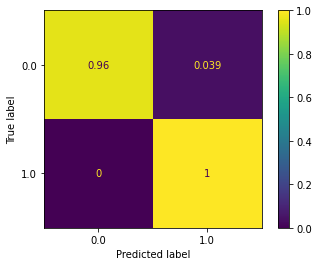

In [248]:
y_pred = model.predict(newData[trainColumns])

print('Train')
print(); print(metrics.classification_report(newData[COL_TARGET], y_pred))

cm = confusion_matrix(newData[COL_TARGET], y_pred, labels=model.classes_, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

Test

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6795
         1.0       1.00      1.00      1.00       510

    accuracy                           1.00      7305
   macro avg       1.00      1.00      1.00      7305
weighted avg       1.00      1.00      1.00      7305



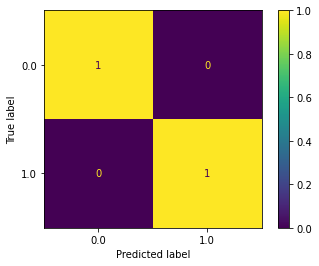

In [249]:
y_pred = model.predict(newTestData[trainColumns])

print('Test')
print(); print(metrics.classification_report(newTestData['Label'], y_pred))

cm = confusion_matrix(newTestData['Label'], y_pred, labels=model.classes_, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

## Metrics

In [88]:
from sklearn.metrics import roc_auc_score, log_loss
from scipy.stats import ks_2samp

In [89]:
def gini(y_true, y_pred):
    return 2 * roc_auc_score(y_true, y_pred) - 1

def lift(y_true, y_pred, lift_perc):
    cutoff = np.percentile(y_pred, 100 - lift_perc)       
    return y_true[y_pred >= cutoff].mean() / y_true.mean()

In [252]:
results = pd.DataFrame({'ID': userIDs,
                        'Pred': testColumns_SCORE_1})
results.head()

,ID,Pred
0,16380.0,0.059683
7,60243.0,0.164864
30,82616.0,0.034158
36,164382.0,0.110354
57,180885.0,0.194390


In [253]:
results.to_csv('/content/drive/MyDrive/uahit_ramazanov.csv', index=False)